In [4]:
import numpy
from tqdm import tqdm
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
TrainFile = pd.read_csv(r"C:\Users\enam1\Documents\dataanalysis\Titanic\titanic_train.csv")

In [14]:
TrainFile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
TrainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
TestFile = pd.read_csv(r"C:\Users\enam1\Documents\dataanalysis\Titanic\titanic_test.csv")
TestFile.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
# Convert some columns into categorical data
TrainFile["Survived"] = TrainFile["Survived"].astype('category')
TrainFile["Pclass"] = TrainFile["Pclass"].astype('category')
TestFile["Pclass"] = TestFile["Pclass"].astype('category')


In [18]:
TrainFile.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
TrainFile[TrainFile['Sex']=='male']['Sex'].count()

577

In [20]:
TrainFile[TrainFile['Sex']=='female']['Sex'].count()

314

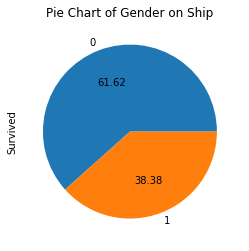

In [27]:
TrainFile["Survived"].value_counts().plot.pie(figsize = (4, 4),
                                        autopct= '%.2f',
                                        fontsize = 10,
                                        title = "Pie Chart of Survival on Ship")

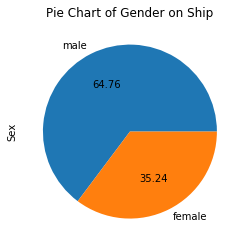

In [24]:
##Plot of female vs male in file
TrainFile["Sex"].value_counts().plot.pie(figsize = (4, 4),
                                        autopct= '%.2f',
                                        fontsize = 10,
                                        title = "Pie Chart of Gender on Ship")

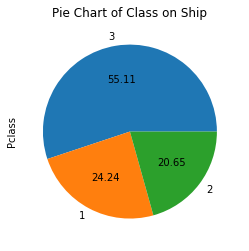

In [28]:
TrainFile["Pclass"].value_counts().plot.pie(figsize = (4, 4),
                                        autopct= '%.2f',
                                        fontsize = 10,
                                        title = "Pie Chart of Class on Ship")

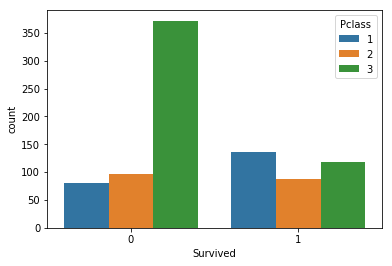

In [25]:
## countplot of survived with class
sns.countplot(x="Survived", hue="Pclass", data=TrainFile)

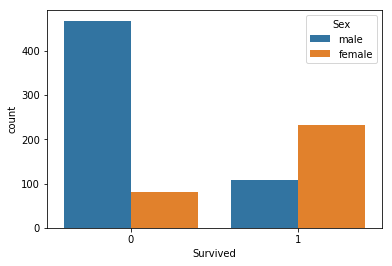

In [26]:
##plot hued with gender
sns.countplot(x="Survived", hue="Sex", data=TrainFile)


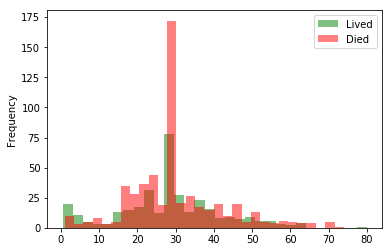

In [188]:
##Looking at the distribution of those who survived and didnt by age.
Lived = TrainFile[TrainFile["Survived"] == 1]
Died = TrainFile[TrainFile["Survived"] == 0]
Lived["Age"].plot.hist(alpha=0.5,color='green',bins=30)
Died["Age"].plot.hist(alpha=0.5,color='red',bins=30)
plt.legend(['Lived','Died'])
plt.show()

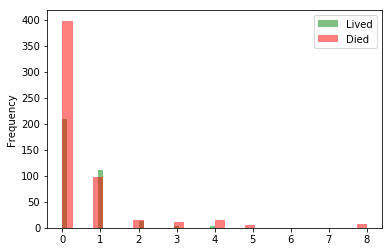

In [189]:
##checking by number of siblings
Lived["SibSp"].plot.hist(alpha=0.5,color='green',bins=30)
Died["SibSp"].plot.hist(alpha=0.5,color='red',bins=30)
plt.legend(['Lived','Died'])
plt.show()

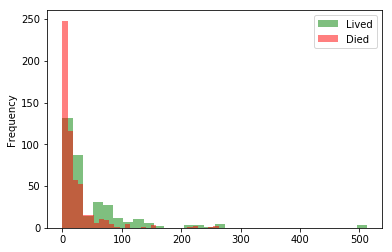

In [190]:
##checking by fare amount
Lived["Fare"].plot.hist(alpha=0.5,color='green',bins=30)
Died["Fare"].plot.hist(alpha=0.5,color='red',bins=30)
plt.legend(['Lived','Died'])
plt.show()

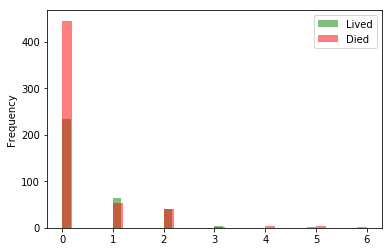

In [192]:
Lived["Parch"].plot.hist(alpha=0.5,color='green',bins=30)
Died["Parch"].plot.hist(alpha=0.5,color='red',bins=30)
plt.legend(['Lived','Died'])
plt.show()

In [30]:
## Data cleaning and looking for nulls.
print('\033[1m'+"Checking if train_df contains any null value:-"+'\033[0m')
print(TrainFile.isnull().sum())
print('\n')
print('\033[1m'+"Checking if test_df contains any null value:-"+'\033[0m')
print(TestFile.isnull().sum())

Checking if train_df contains any null value:-
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Checking if test_df contains any null value:-
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [31]:
##Fill ages with median values to avoild null values in ML
TestFile['Age'].fillna(TestFile['Age'].median(), inplace = True)
TrainFile['Age'].fillna(TrainFile['Age'].median(), inplace = True)

In [32]:
print('\033[1m'+"Checking if train_df contains any null value:-"+'\033[0m')
print(TrainFile.isnull().sum())
print('\n')
print('\033[1m'+"Checking if test_df contains any null value:-"+'\033[0m')
print(TestFile.isnull().sum())

Checking if train_df contains any null value:-
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Checking if test_df contains any null value:-
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [44]:
##Drop the cabin values since most of people might not have been in their cabins at time of wreck anyways
##make file with only id and names incase needed later for identifications.
NewTrainName = pd.DataFrame(data = TrainFile, columns = ["PassengerId", "Name"])
NewTestName = pd.DataFrame(data = TestFile, columns = ["PassengerId", "Name"])
drop_col=["Cabin", "Name"]
TrainFile.drop(drop_col, axis=1, inplace=True)
TestFile.drop(drop_col, axis=1, inplace=True)

In [45]:
TestFile['Fare'].fillna(TestFile['Fare'].median(), inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda

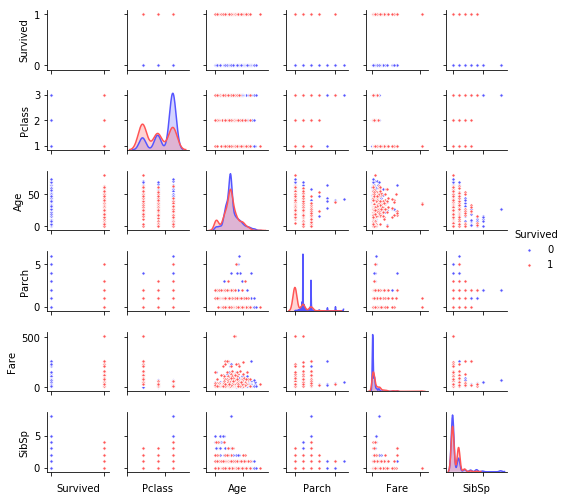

In [94]:
g = sns.pairplot(TrainFile[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked',
       u'SibSp']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

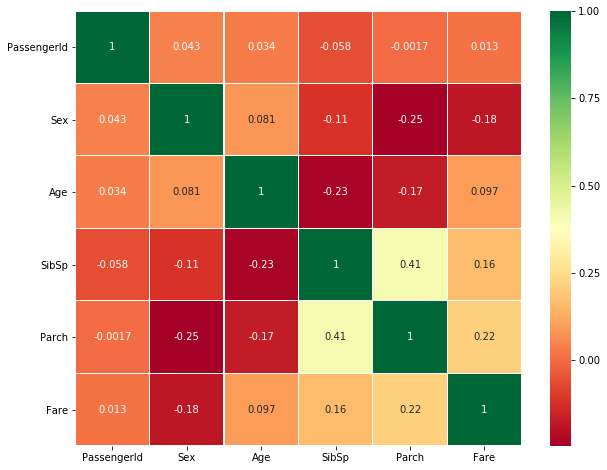

In [174]:
sns.heatmap(TrainFile.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [175]:
print('Highest Age:',TrainFile['Age'].max(),'   Lowest Age:',TrainFile['Age'].min())

Highest Age: 80.0    Lowest Age: 0.42


In [46]:
## start cross validation
from sklearn.model_selection import train_test_split #split the dat in test and train sets
from sklearn.model_selection import cross_val_score #score evaluation with cross validation
from sklearn.model_selection import cross_val_predict #prediction with cross validation
from sklearn.metrics import confusion_matrix #for confusion matrix (metric of succes)
from sklearn.model_selection import KFold #for K-fold cross validation
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

In [147]:
##change some categories
from sklearn.preprocessing import LabelEncoder
num = LabelEncoder()
TrainFile["Sex"] = num.fit_transform(TrainFile["Sex"].astype("str"))
TestFile["Sex"] = num.fit_transform(TestFile["Sex"].astype("str"))
TrainFile.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,0,35.0,1,0,113803,53.1000,S
4,5,0,3,1,35.0,0,0,373450,8.0500,S


In [148]:
#feature selections
feature_cols = ["Age", "Sex","Pclass", "SibSp"]
X = TrainFile[feature_cols]
y = TrainFile.Survived

In [121]:
kf = KFold( n_splits = 10, shuffle = False)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [150]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8059701492537313

In [151]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7985074626865671

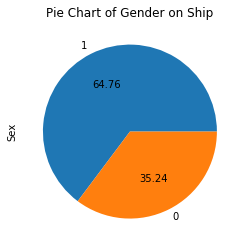

In [154]:
##Plot of female vs male in file changed to 0 for female and 1 for male
TrainFile["Sex"].value_counts().plot.pie(figsize = (4, 4),
                                        autopct= '%.2f',
                                        fontsize = 10,
                                        title = "Pie Chart of Gender on Ship")

In [157]:
all_features = TrainFile.drop("Survived",axis=1)
targeted_feature = TrainFile["Survived"]

In [198]:
features1 = TrainFile["Age"]
features2 = TrainFile["Sex"]
features3 = TrainFile["SibSp"]

In [158]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(all_features,
                                                 targeted_feature,
                                                 test_size=0.3,random_state=42)

In [195]:
X_trains1,X_tests1,y_trains1,y_tests1 = train_test_split(features1,
                                                 targeted_feature,
                                                 test_size=0.3,random_state=42)

In [199]:
X_trains2,X_tests2,y_trains2,y_tests2 = train_test_split(features2,
                                                 targeted_feature,
                                                 test_size=0.3,random_state=42)

In [200]:
X_trains3,X_tests3,y_trains3,y_tests3 = train_test_split(features3,
                                                 targeted_feature,
                                                 test_size=0.3,random_state=42)

In [160]:
train_X = TrainFile.drop("Survived", axis=1)
train_Y=TrainFile["Survived"]
test_X  = TestFile
train_X.shape, train_Y.shape, test_X.shape

((891, 9), (891,), (418, 9))

In [205]:
#Lets prepare data sets for training. 
train,test=train_test_split(TrainFile,test_size=0.3,random_state=0,stratify=TrainFile['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=TrainFile[TrainFile.columns[1:]]
Y=TrainFile['Survived']

TypeError: object of type 'CategoricalDtype' has no len()

In [ ]:

#Logistic Regression
model = LogisticRegression(C=0.05,solver='liblinear')
model.fit(train_X,train_Y.values.ravel())
LR_prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression model is \t',metrics.accuracy_score(LR_prediction,test_Y))

# Naive Bayes
model=GaussianNB()
model.fit(train_X,train_Y.values.ravel())
NB_prediction=model.predict(test_X)
print('The accuracy of the NaiveBayes model is\t\t\t',metrics.accuracy_score(NB_prediction,test_Y))

# Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
DT_prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is \t\t\t',metrics.accuracy_score(DT_prediction,test_Y))

# Random Forest
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y.values.ravel())
RF_prediction=model.predict(test_X)
print('The accuracy of the Random Forests model is \t\t',metrics.accuracy_score(RF_prediction,test_Y))

In [204]:
##Age:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
n_estim=range(100,1000,100)
#This is the grid
param_grid = {"n_estimators" :n_estim}

model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(X_trains3,y_trains3)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


TypeError: object of type 'CategoricalDtype' has no len()

In [ ]:
##Gender:


In [ ]:
##Sibsp:


In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
n_estim=range(100,1000,100)
#This is the grid
param_grid = {"n_estimators" :n_estim}
train_z = TrainFile["Age"]

model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(train_z,train_Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


TypeError: object of type 'CategoricalDtype' has no len()

In [164]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=2,min_samples_leaf=1,
                             max_features='auto')

model.fit(X_train,y_train)

prediction_tree=model.predict(X_test)

print('Accuracy =',round(accuracy_score(prediction_tree,y_test)*100,2))

result_tree=cross_val_score(model,all_features,targeted_feature,cv=10,scoring='accuracy')

print('Cross validated score =',round(result_tree.mean()*100,2))

y_pred = cross_val_predict(model,all_features,targeted_feature,cv=10)

sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")

plt.title('Confusion matrix', y=1.05, size=15)

TypeError: object of type 'CategoricalDtype' has no len()

In [181]:
TrainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: category(2), float64(2), int32(1), int64(3), object(2)
memory usage: 54.2+ KB


In [165]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 7)

model.fit(X_train,y_train)

prediction_knn=model.predict(X_test)

print('Accuracy =',round(accuracy_score(prediction_knn,y_test)*100,2))

result_knn=cross_val_score(model,all_features,targeted_feature,cv=10,scoring='accuracy')

print('Cross validated score =',round(result_knn.mean()*100,2))

y_pred = cross_val_predict(model,all_features,targeted_feature,cv=10)

sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")

plt.title('Confusion matrix', y=1.05, size=15)

TypeError: object of type 'CategoricalDtype' has no len()

In [166]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import accuracy_score  #for accuracy_score

model = LogisticRegression()

model.fit(X_train,y_train)

prediction_lr=model.predict(X_test)

print('Accuracy =',round(accuracy_score(prediction_lr,y_test)*100,2))

result_lr=cross_val_score(model,all_features,targeted_feature,cv=10,scoring='accuracy')

print('Cross validated score =',round(result_lr.mean()*100,2))

y_pred = cross_val_predict(model,all_features,targeted_feature,cv=10)

sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")

plt.title('Confusion matrix', y=1.05, size=15)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy = 80.6


TypeError: object of type 'CategoricalDtype' has no len()

In [167]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

modelf.fit(X_train,y_train)


# Best Estimator
modelf.best_estimator_
print('Accuracy = ', round((modelf.best_score_)*100,2))

ModuleNotFoundError: No module named 'xgboost'

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_test)

print('Accuracy',round(accuracy_score(prediction_lda,y_test)*100,2))

result_lda=cross_val_score(model,all_features,targeted_feature,cv=10,scoring='accuracy')

print('The cross validated score',round(result_lda.mean()*100,2))

y_pred = cross_val_predict(model,all_features,targeted_feature,cv=10)

sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")

plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 79.85


TypeError: object of type 'CategoricalDtype' has no len()

In [169]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
model_rf = RandomForestClassifier(criterion='gini', n_estimators=100,
                             min_samples_split=2,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

model_rf.fit(X_train,y_train)

prediction_rm= model_rf.predict(X_test)

print('Accuracy =',round(accuracy_score(prediction_rm,y_test)*100,2))

result_rm=cross_val_score(model_rf,all_features,targeted_feature,cv=10,scoring='accuracy')

print('Cross validated score =',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(model_rf,all_features,targeted_feature,cv=10)

sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")

plt.title('Confusion matrix', y=1.05, size=15)

TypeError: object of type 'CategoricalDtype' has no len()

In [170]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)

print('Accuracy',round(accuracy_score(prediction_gbc,y_test)*100,2))

result_gbc=cross_val_score(model,all_features,targeted_feature,cv=10,scoring='accuracy')

print('The cross validated score',round(result_gbc.mean()*100,2))

y_pred = cross_val_predict(model,all_features,targeted_feature,cv=10)

sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 80.6


TypeError: object of type 'CategoricalDtype' has no len()

In [171]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(test_X)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest)

TypeError: object of type 'CategoricalDtype' has no len()

In [173]:
submission = pd.DataFrame({
        "PassengerId": TestFile["PassengerId"],
        "Survived": Y_pred_rf})

NameError: name 'Y_pred_rf' is not defined

In [179]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


TypeError: object of type 'CategoricalDtype' has no len()

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot('SibSp',hue='Survived',data=data,ax=ax[0,0])
ax[0,0].set_title('SibSp vs Survived')
sns.barplot('SibSp','Survived',data=data,ax=ax[0,1])
ax[0,1].set_title('SibSp vs Survived')

sns.countplot('Parch',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Parch vs Survived')
sns.barplot('Parch','Survived',data=data,ax=ax[1,1])
ax[1,1].set_title('Parch vs Survived')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [155]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

TypeError: object of type 'CategoricalDtype' has no len()

In [153]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

TypeError: object of type 'CategoricalDtype' has no len()

In [129]:
folds = StratifiedKFold(n_splits = 10)

In [136]:
def get_score(model,X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test,y_test)

In [139]:
scores_l = []
scores_svm = []

for X_train, y_test in folds.split(X, y):
    scores_l.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
       

TypeError: object of type 'CategoricalDtype' has no len()

In [134]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

[]

In [143]:
cross_val_score(LogisticRegression()

TypeError: 'LogisticRegression' object is not callable

In [145]:
cross_val_score(SVC(), X, y, cv = 5)

TypeError: object of type 'CategoricalDtype' has no len()

In [123]:
for X_train, y_test in kf.split(X):
    print(X_train, y_test)

[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 33

 881 882 883 884 885 886 887 888 889 890] [179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146

 881 882 883 884 885 886 887 888 889 890] [446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463
 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481
 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499
 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146

 881 882 883 884 885 886 887 888 889 890] [713 714 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730
 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748
 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764 765 766
 767 768 769 770 771 772 773 774 775 776 777 778 779 780 781 782 783 784
 785 786 787 788 789 790 791 792 793 794 795 796 797 798 799 800 801]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146

In [127]:
get_score(SVC(), X_train, X_test, y_train, y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209.
 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223.
 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237.
 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250. 251.
 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265.
 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278. 279.
 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292. 293.
 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306. 307.
 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320. 321.
 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334. 335.
 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348. 349.
 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362. 363.
 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376. 377.
 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390. 391.
 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403. 404. 405.
 406. 407. 408. 409. 410. 411. 412. 413. 414. 415. 416. 417. 418. 419.
 420. 421. 422. 423. 424. 425. 426. 427. 428. 429. 430. 431. 432. 433.
 434. 435. 436. 437. 438. 439. 440. 441. 442. 443. 444. 445. 446. 447.
 448. 449. 450. 451. 452. 453. 454. 455. 456. 457. 458. 459. 460. 461.
 462. 463. 464. 465. 466. 467. 468. 469. 470. 471. 472. 473. 474. 475.
 476. 477. 478. 479. 480. 481. 482. 483. 484. 485. 486. 487. 488. 489.
 490. 491. 492. 493. 494. 495. 496. 497. 498. 499. 500. 501. 502. 503.
 504. 505. 506. 507. 508. 509. 510. 511. 512. 513. 514. 515. 516. 517.
 518. 519. 520. 521. 522. 523. 524. 525. 526. 527. 528. 529. 530. 531.
 532. 533. 534. 535. 536. 537. 538. 539. 540. 541. 542. 543. 544. 545.
 546. 547. 548. 549. 550. 551. 552. 553. 554. 555. 556. 557. 558. 559.
 560. 561. 562. 563. 564. 565. 566. 567. 568. 569. 570. 571. 572. 573.
 574. 575. 576. 577. 578. 579. 580. 581. 582. 583. 584. 585. 586. 587.
 588. 589. 590. 591. 592. 593. 594. 595. 596. 597. 598. 599. 600. 601.
 602. 603. 604. 605. 606. 607. 608. 609. 610. 611. 612. 613. 614. 615.
 616. 617. 618. 619. 620. 621. 622. 623. 624. 625. 626. 627. 628. 629.
 630. 631. 632. 633. 634. 635. 636. 637. 638. 639. 640. 641. 642. 643.
 644. 645. 646. 647. 648. 649. 650. 651. 652. 653. 654. 655. 656. 657.
 658. 659. 660. 661. 662. 663. 664. 665. 666. 667. 668. 669. 670. 671.
 672. 673. 674. 675. 676. 677. 678. 679. 680. 681. 682. 683. 684. 685.
 686. 687. 688. 689. 690. 691. 692. 693. 694. 695. 696. 697. 698. 699.
 700. 701. 702. 703. 704. 705. 706. 707. 708. 709. 710. 711. 712. 713.
 714. 715. 716. 717. 718. 719. 720. 721. 722. 723. 724. 725. 726. 727.
 728. 729. 730. 731. 732. 733. 734. 735. 736. 737. 738. 739. 740. 741.
 742. 743. 744. 745. 746. 747. 748. 749. 750. 751. 752. 753. 754. 755.
 756. 757. 758. 759. 760. 761. 762. 763. 764. 765. 766. 767. 768. 769.
 770. 771. 772. 773. 774. 775. 776. 777. 778. 779. 780. 781. 782. 783.
 784. 785. 786. 787. 788. 789. 790. 791. 792. 793. 794. 795. 796. 797.
 798. 799. 800. 801.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [140]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
## doesnt work with values in these dataset

ValueError: Expected 2D array, got 1D array instead:
array=[ 90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103.
 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117.
 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131.
 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215.
 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229.
 230. 231. 232. 233. 234. 235. 236. 237. 238. 239. 240. 241. 242. 243.
 244. 245. 246. 247. 248. 249. 250. 251. 252. 253. 254. 255. 256. 257.
 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270. 271.
 272. 273. 274. 275. 276. 277. 278. 279. 280. 281. 282. 283. 284. 285.
 286. 287. 288. 289. 290. 291. 292. 293. 294. 295. 296. 297. 298. 299.
 300. 301. 302. 303. 304. 305. 306. 307. 308. 309. 310. 311. 312. 313.
 314. 315. 316. 317. 318. 319. 320. 321. 322. 323. 324. 325. 326. 327.
 328. 329. 330. 331. 332. 333. 334. 335. 336. 337. 338. 339. 340. 341.
 342. 343. 344. 345. 346. 347. 348. 349. 350. 351. 352. 353. 354. 355.
 356. 357. 358. 359. 360. 361. 362. 363. 364. 365. 366. 367. 368. 369.
 370. 371. 372. 373. 374. 375. 376. 377. 378. 379. 380. 381. 382. 383.
 384. 385. 386. 387. 388. 389. 390. 391. 392. 393. 394. 395. 396. 397.
 398. 399. 400. 401. 402. 403. 404. 405. 406. 407. 408. 409. 410. 411.
 412. 413. 414. 415. 416. 417. 418. 419. 420. 421. 422. 423. 424. 425.
 426. 427. 428. 429. 430. 431. 432. 433. 434. 435. 436. 437. 438. 439.
 440. 441. 442. 443. 444. 445. 446. 447. 448. 449. 450. 451. 452. 453.
 454. 455. 456. 457. 458. 459. 460. 461. 462. 463. 464. 465. 466. 467.
 468. 469. 470. 471. 472. 473. 474. 475. 476. 477. 478. 479. 480. 481.
 482. 483. 484. 485. 486. 487. 488. 489. 490. 491. 492. 493. 494. 495.
 496. 497. 498. 499. 500. 501. 502. 503. 504. 505. 506. 507. 508. 509.
 510. 511. 512. 513. 514. 515. 516. 517. 518. 519. 520. 521. 522. 523.
 524. 525. 526. 527. 528. 529. 530. 531. 532. 533. 534. 535. 536. 537.
 538. 539. 540. 541. 542. 543. 544. 545. 546. 547. 548. 549. 550. 551.
 552. 553. 554. 555. 556. 557. 558. 559. 560. 561. 562. 563. 564. 565.
 566. 567. 568. 569. 570. 571. 572. 573. 574. 575. 576. 577. 578. 579.
 580. 581. 582. 583. 584. 585. 586. 587. 588. 589. 590. 591. 592. 593.
 594. 595. 596. 597. 598. 599. 600. 601. 602. 603. 604. 605. 606. 607.
 608. 609. 610. 611. 612. 613. 614. 615. 616. 617. 618. 619. 620. 621.
 622. 623. 624. 625. 626. 627. 628. 629. 630. 631. 632. 633. 634. 635.
 636. 637. 638. 639. 640. 641. 642. 643. 644. 645. 646. 647. 648. 649.
 650. 651. 652. 653. 654. 655. 656. 657. 658. 659. 660. 661. 662. 663.
 664. 665. 666. 667. 668. 669. 670. 671. 672. 673. 674. 675. 676. 677.
 678. 679. 680. 681. 682. 683. 684. 685. 686. 687. 688. 689. 690. 691.
 692. 693. 694. 695. 696. 697. 698. 699. 700. 701. 702. 703. 704. 705.
 706. 707. 708. 709. 710. 711. 712. 713. 714. 715. 716. 717. 718. 719.
 720. 721. 722. 723. 724. 725. 726. 727. 728. 729. 730. 731. 732. 733.
 734. 735. 736. 737. 738. 739. 740. 741. 742. 743. 744. 745. 746. 747.
 748. 749. 750. 751. 752. 753. 754. 755. 756. 757. 758. 759. 760. 761.
 762. 763. 764. 765. 766. 767. 768. 769. 770. 771. 772. 773. 774. 775.
 776. 777. 778. 779. 780. 781. 782. 783. 784. 785. 786. 787. 788. 789.
 790. 791. 792. 793. 794. 795. 796. 797. 798. 799. 800. 801. 802. 803.
 804. 805. 806. 807. 808. 809. 810. 811. 812. 813. 814. 815. 816. 817.
 818. 819. 820. 821. 822. 823. 824. 825. 826. 827. 828. 829. 830. 831.
 832. 833. 834. 835. 836. 837. 838. 839. 840. 841. 842. 843. 844. 845.
 846. 847. 848. 849. 850. 851. 852. 853. 854. 855. 856. 857. 858. 859.
 860. 861. 862. 863. 864. 865. 866. 867. 868. 869. 870. 871. 872. 873.
 874. 875. 876. 877. 878. 879. 880. 881. 882. 883. 884. 885. 886. 887.
 888. 889. 890.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [106]:
age = []
for i in TrainFile.SibSp:
    for j in range(len(i)):
        print(i[j])

TypeError: object of type 'int' has no len()

In [103]:
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 33

 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 2

 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 2

 785 786 787 788 789 790 791 792 793 794 795 796 797 798 799 800 801]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 2

In [102]:
 from sklearn.model_selection import StratifiedKFold
 skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print("%s %s" % (train, test))

TypeError: object of type 'CategoricalDtype' has no len()

In [80]:
scores = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')

TypeError: object of type 'CategoricalDtype' has no len()

In [81]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='accuracy')
print (Scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: could not convert string to float: 'male'

In [77]:
cross_val_score(LogisticRegression(), X, y).tolist()

TypeError: object of type 'CategoricalDtype' has no len()

In [8]:
trainFile.head()

AttributeError: 'str' object has no attribute 'head'

In [ ]:
Data_location="../Titanic/"
Language = "english"

trainBodiesFile1 = Data_location + "titanic_train.csv"
trainHeadlinesFile1 = Data_location + "train_stances.csv"
testBodiesFile1 = Data_location + "competition_test_bodies.csv"
testHeadlinesFile1 = Data_location + "competition_test_stances.csv"

# Loading data 
trainBodies1 = pandas.read_csv(trainBodiesFile1)
trainBodiesF1 = pandas.read_csv(trainBodiesFile1)
trainHeadlines1 = pandas.read_csv(trainHeadlinesFile1)
trainHeadlinesF1 = pandas.read_csv(trainHeadlinesFile1)
testBodies1 = pandas.read_csv(testBodiesFile1)
testBodiesF1 = pandas.read_csv(testBodiesFile1)
testHeadlines1 = pandas.read_csv(testHeadlinesFile1)
testHeadlinesF1 = pandas.read_csv(testHeadlinesFile1)

# Internal variables
Stemmer = SnowballStemmer(Language)
wnl = WordNetLemmatizer()
Stopwords = set(nltk.corpus.stopwords.words(Language))
tokenizer = RegexpTokenizer(r'[a-z]+\w*')
TextData = []

def separation(text):
	Separator = "+"*50
	print("")
	print("")
	print(Separator+" "+text+" "+Separator)
	print("")
	print("")